In [1]:
import torch, os, pickle, time
import torch_geometric as tg
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import os.path as osp
import networkx as nx
path='~/../../tigress/cj1223/merger_trees/isotrees/'
transform_path='~/../../tigress/cj1223/gmdata/transformer'
all_cols=np.array([0,2,4,10,11,12,13,14,15,16,23,24,25,35]+list(range(37,60)))

In [2]:
# os.listdir(osp.expanduser('~/../../../scratch/gpfs/cj1223/GraphStorage/'))

In [3]:
# case='vlarge__all_8t_z0.0_None'
case='vlarge_all_all_t_z0.0_None'

data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))
meta=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/meta.pkl'), 'rb'))

In [4]:
xs=[]
ys=[]
ls=[]
for d in data:
    xs.append(d.x.numpy()[0,:]) #final only
    ys.append(d.y.numpy())
    ls.append(len(d.x.numpy()))
xs=np.vstack(xs)
# xs[:,40]=np.log10(xs[:,40])
ys=np.vstack(ys)
ls=np.array(ls)
splits=np.cumsum(ls)

In [5]:
meta['long'], meta['fails']

(119, 0)

In [6]:
halos=pd.read_table(path+f'isotree_0_0_0.dat', skiprows=0, nrows=1, delimiter='\s+')

In [7]:
cols_h = []
for i, col in enumerate(halos.columns[all_cols]):
    if col[-1] == ')':
        cols_h.append(col[:-3]+f'({i})')
    else:
        cols_h.append(col+f'({i})')        

100%|██████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 237.81it/s]


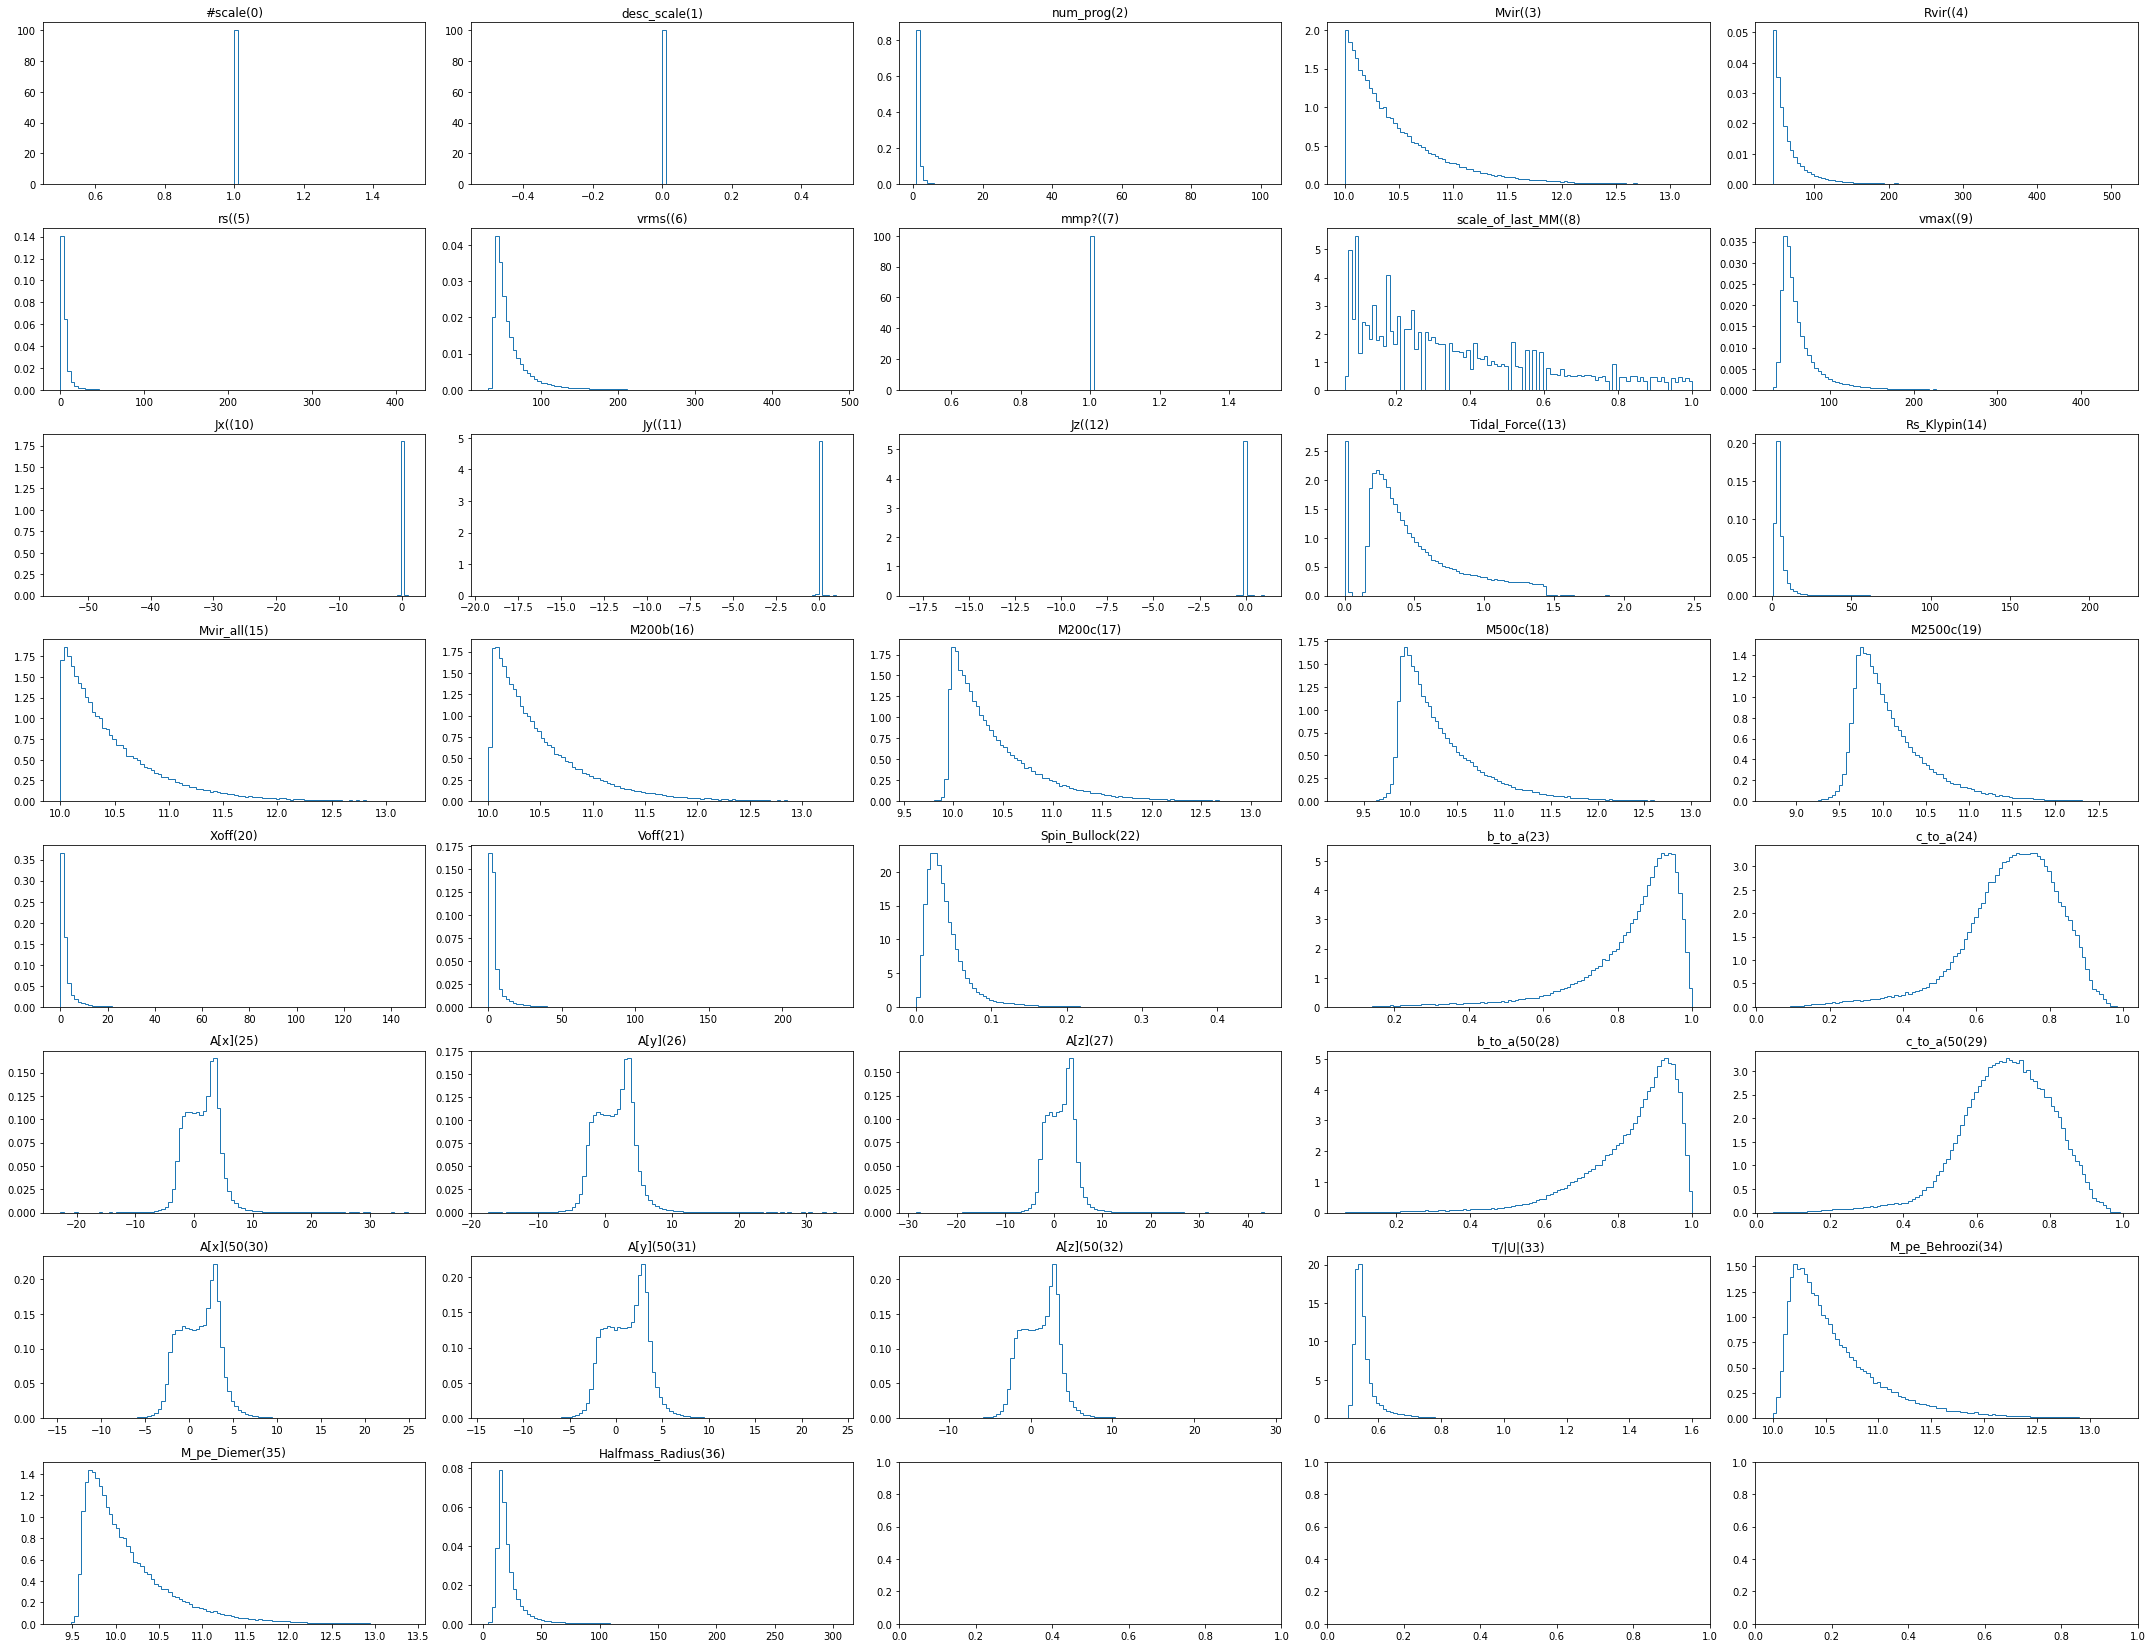

In [8]:

fig,ax=plt.subplots(nrows = 8, ncols = 5, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(xs[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_h[i])

fig.tight_layout()

## Investigate

In [9]:
# targets
ex=f'../samout/{0}_{0}_{0}/galprop_0-99.dat'
pdc=pd.read_table(path+ex, skiprows=0, delimiter=',', nrows=41, header=None)
targets=[8, 11, 15, 16, 17, 19, 21, 23]
targets = np.arange(41)

In [10]:
pdc.iloc[:,0]

0                                # 0 halo_index (long) 
1                           # 1 birthhaloid (long long)
2                            # 2 roothaloid (long long)
3                                          # 3 redshift
4                               # 4 sat_type 0= central
5               # 5 mhalo total halo mass [1.0E09 Msun]
6               # 6 m_strip stripped mass [1.0E09 Msun]
7                   # 7 rhalo halo virial radius [Mpc)]
8                  # 8 mstar stellar mass [1.0E09 Msun]
9       # 9 mbulge stellar mass of bulge [1.0E09 Msun] 
10    # 10 mstar_merge stars entering via mergers] [...
11        # 11 v_disk rotation velocity of disk [km/s] 
12    # 12 sigma_bulge velocity dispersion of bulge ...
13    # 13 r_disk exponential scale radius of stars+...
14      # 14 r_bulge 3D effective radius of bulge [kpc]
15       # 15 mcold cold gas mass in disk [1.0E09 Msun]
16                 # 16 mHI cold gas mass [1.0E09 Msun]
17                 # 17 mH2 cold gas mass [1.0E0

In [11]:
colst=pdc.iloc[targets,0]
cols_t = []
for i, col in enumerate(colst):
    cols_t.append(col[4:]+f'({i})')        

100%|██████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 231.54it/s]


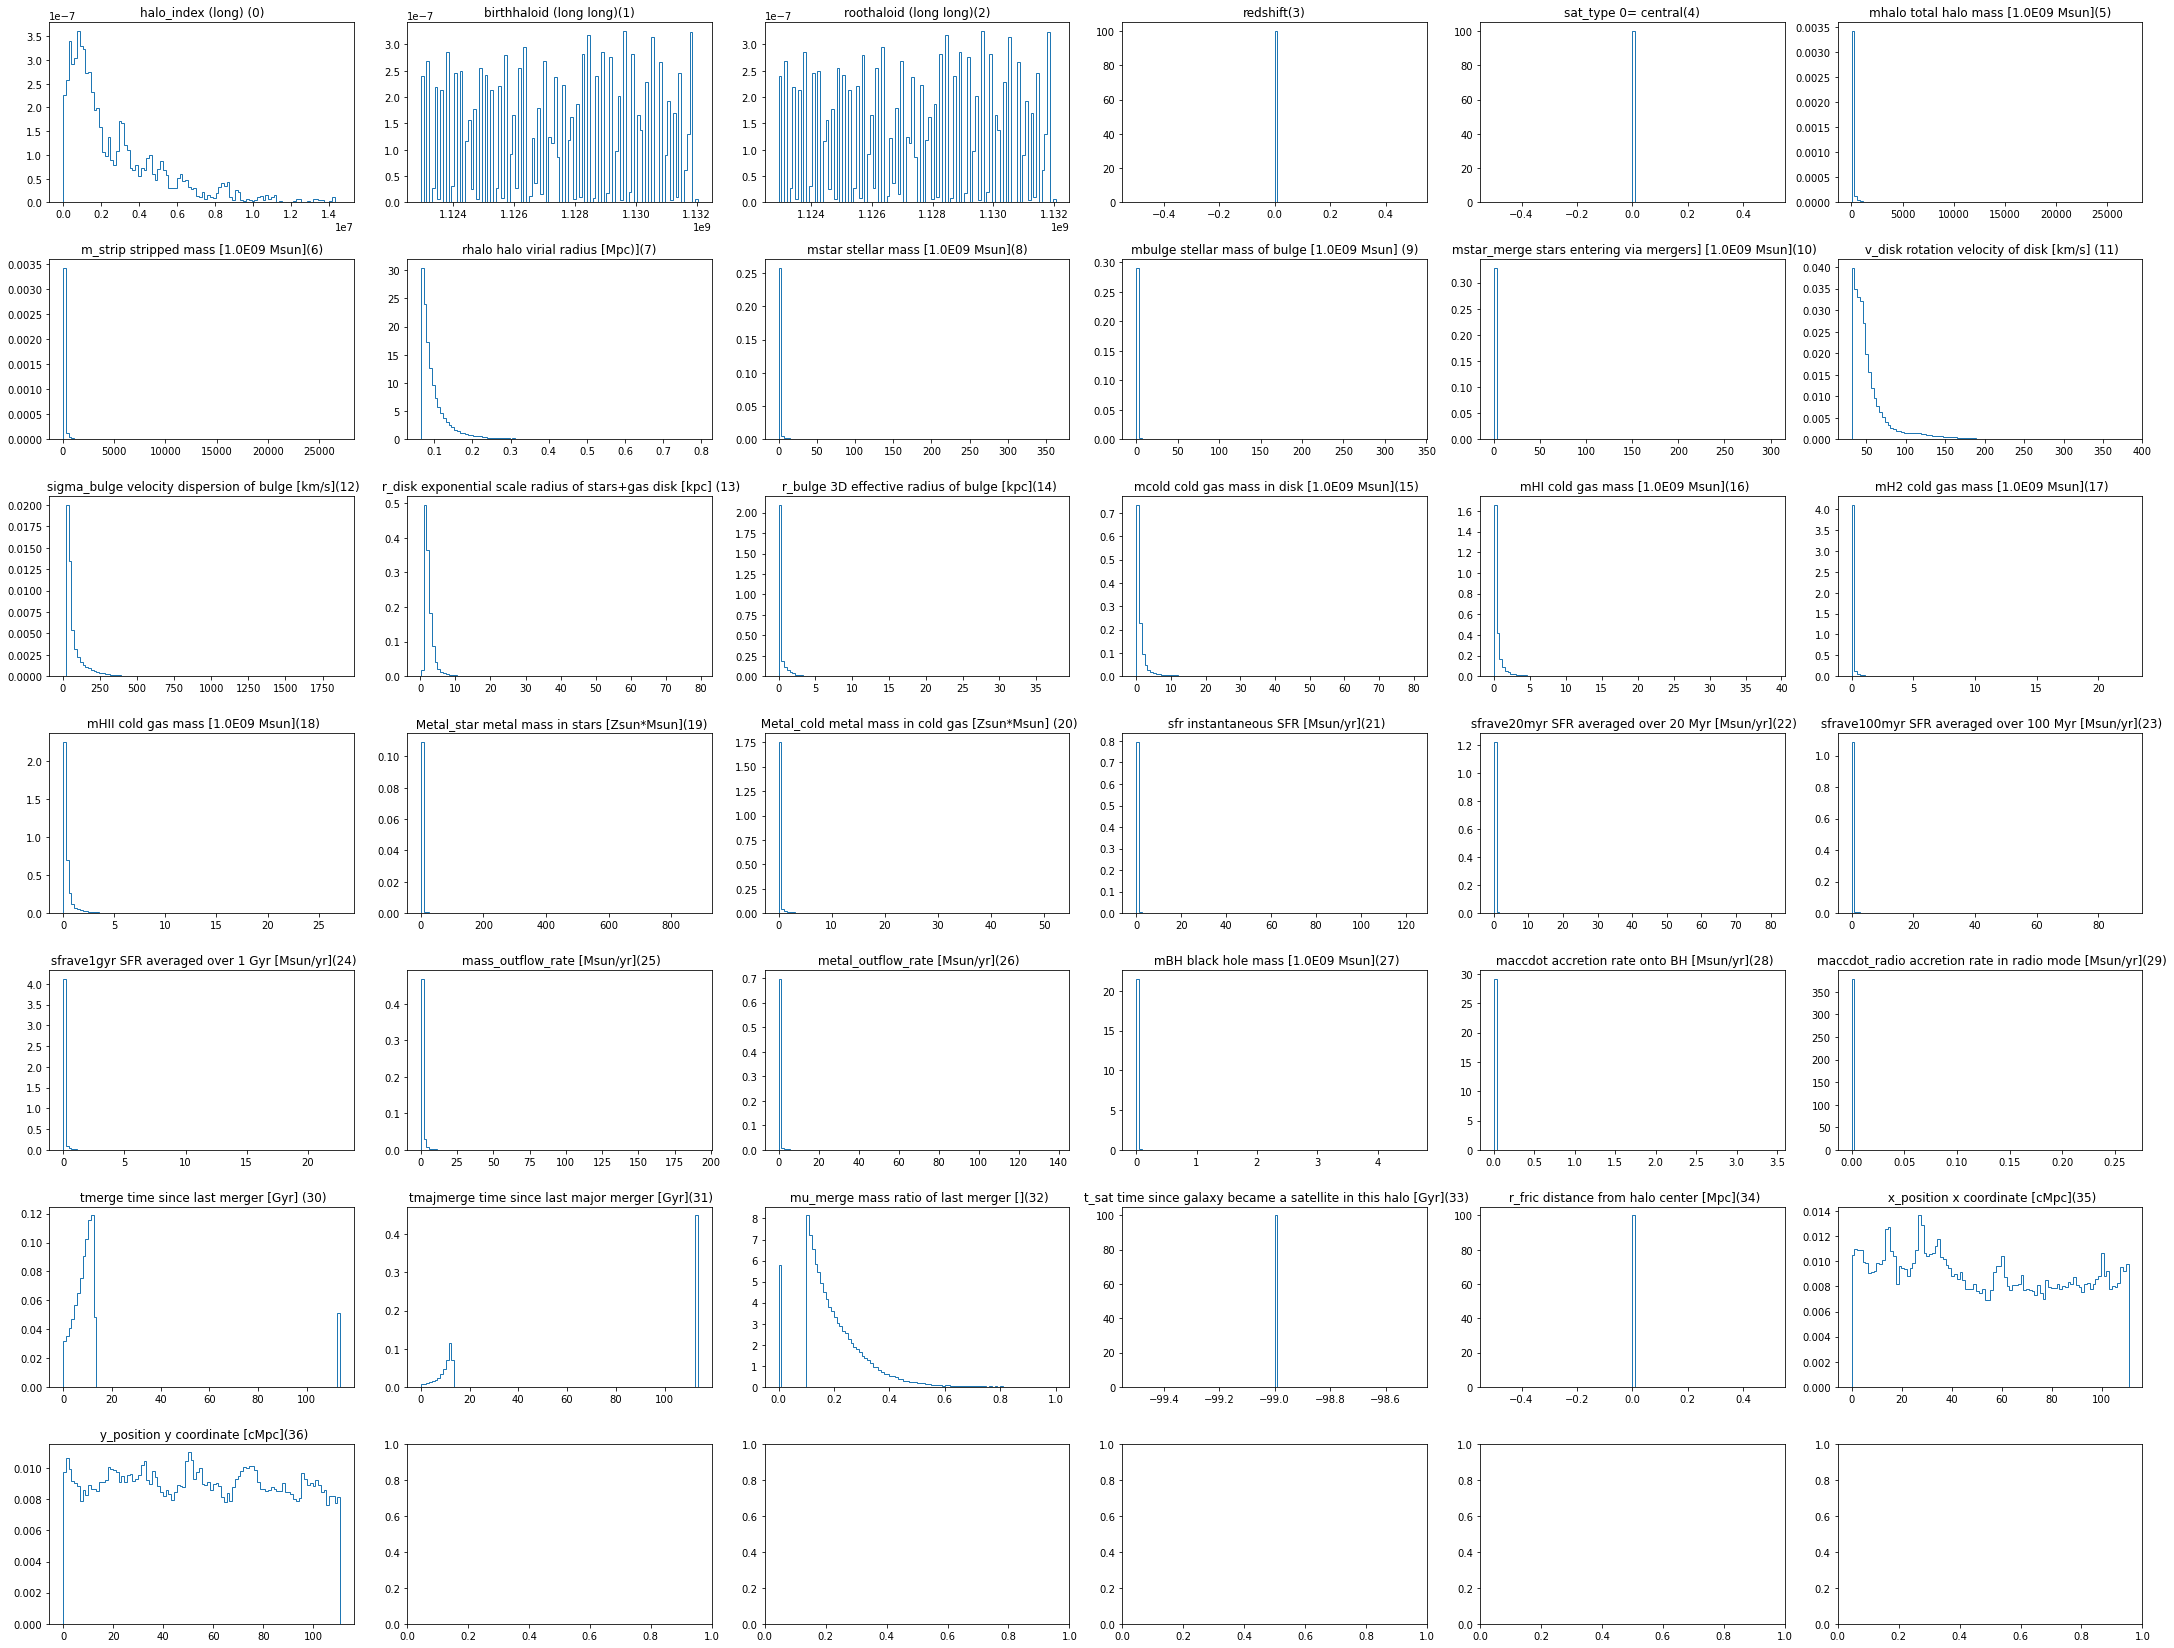

In [12]:

fig,ax=plt.subplots(nrows = 7, ncols = 6, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    ax[i].hist(ys[:,i], bins=100, density=1, histtype='step');
    ax[i].set(title=cols_t[i])

fig.tight_layout()

100%|██████████████████████████████████████████████████████████████| 37/37 [00:00<00:00, 177.43it/s]


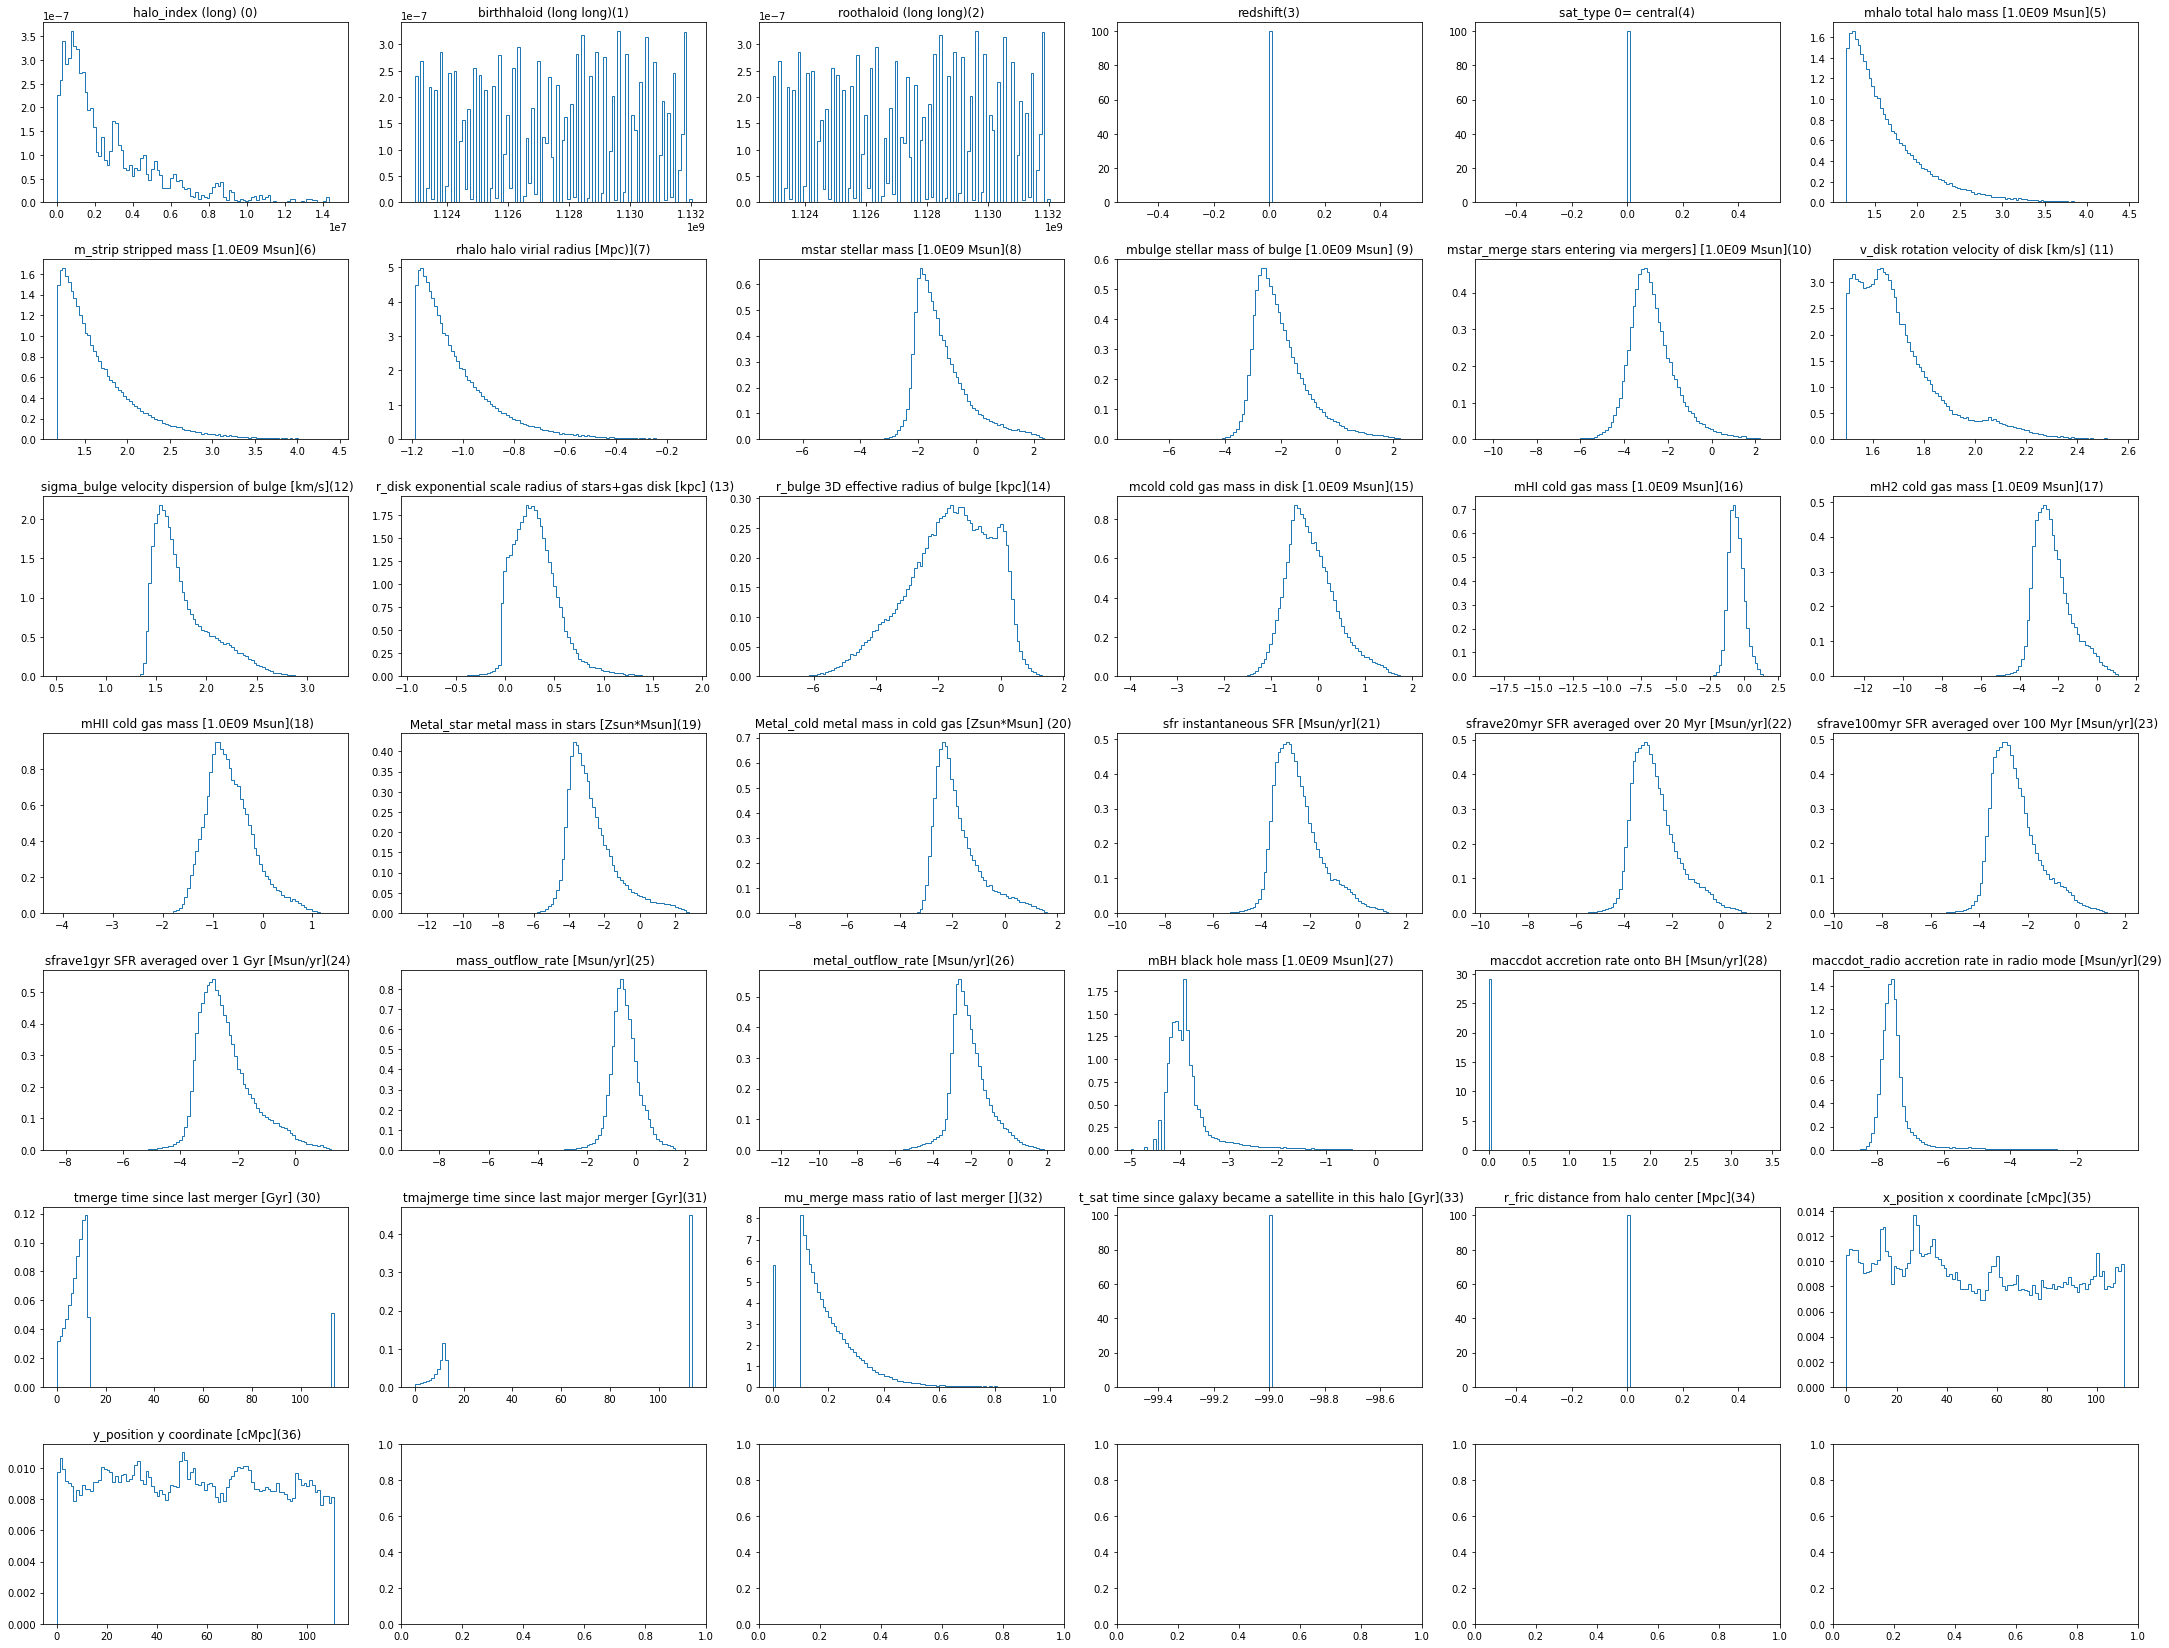

In [56]:
log=np.array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 29])
masks = []
fig,ax=plt.subplots(nrows = 7, ncols = 6, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_h))):
    mask = ys[:,i]>0
    masks.append( mask )
    if i in log:
        ax[i].hist(np.log10(ys[:,i][mask]), bins=100, density=1, histtype='step');
        ax[i].set(title=cols_t[i])
    else:
        ax[i].hist(ys[:,i], bins=100, density=1, histtype='step');
        ax[i].set(title=cols_t[i])

fig.tight_layout()

In [57]:
log

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 29])

In [58]:
mask = masks[0]
for i, m in enumerate(masks):
    if i in log:
        mask = np.logical_and(mask,m)
        print(sum(mask))

108808
108808
108808
108808
108760
108690
108690
108690
108690
108690
108593
108422
108339
108339
108339
108338
108338
108338
108338
108338
108338
108338
108338
108338


In [59]:
sum(~mask)

470

In [60]:
testidx = pickle.load(open(osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage/tvt_idx/test_idx.pkl'), 'rb'))

In [61]:
s=0
testid2 = []
for i in tqdm(testidx):
    if mask[i]:
        s=np.sum(~mask[:i])
        testid2.append(i-s)

100%|███████████████████████████████████████████████████████| 21762/21762 [00:02<00:00, 9843.53it/s]


In [62]:
max(testid2), len(testid2), len(testidx)-len(testid2)

(108334, 21679, 83)

In [63]:
with open(osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphStorage/tvt_idx/test_idx_rm.pkl'), 'wb') as handle:
    pickle.dump(testid2, handle)

In [77]:
yt = pd.DataFrame(np.log10(ys), columns=cols_t)
mask=np.array(yt.min()==-np.inf)
mi = np.array(yt.replace(-np.inf, 0).min())[mask]

infcols = yt.columns[mask]

for i, col in enumerate(infcols):
    yt[col] = yt[col].replace(-np.inf, mi[i])

/tmp/ipykernel_974/1530446983.py:1: RuntimeWarning: divide by zero encountered in log10
  yt = pd.DataFrame(np.log10(ys), columns=cols_t)
/tmp/ipykernel_974/1530446983.py:1: RuntimeWarning: invalid value encountered in log10
  yt = pd.DataFrame(np.log10(ys), columns=cols_t)


In [78]:
mi, mask

(array([  0.        ,   0.        ,  -7.36172056, -10.20476627,
         -7.31454945,  -3.98824787, -18.66386032, -12.88613319,
         -4.11901665,  -8.84874344,  -9.44278717,  -9.65537167,
         -9.47837162,  -8.30962467,  -9.00522518, -12.41852856,
         -5.14348984,  -2.01113248,  -2.01113248,  -0.99998701,
          0.        ,  -2.        ,  -1.69897008]),
 array([False, False, False,  True,  True, False, False, False, False,
         True,  True, False, False, False,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True, False,  True,  True,  True, False,  True, False,
        False, False, False,  True,  True]))

In [65]:
yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)

yt2 = yt2.replace(-np.inf, np.nan)
idx_throw  = np.array(yt2[yt2.isna().any(axis=1)].index)
idx_keep  = np.array(yt2.dropna().index)

/tmp/ipykernel_974/2248393095.py:1: RuntimeWarning: divide by zero encountered in log10
  yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)
/tmp/ipykernel_974/2248393095.py:1: RuntimeWarning: invalid value encountered in log10
  yt2 = pd.DataFrame(np.log10(ys), columns=cols_t)


In [66]:
# ys

In [67]:
yt.describe()

,halo_index (long) (0),birthhaloid (long long)(1),roothaloid (long long)(2),redshift(3),sat_type 0= central(4),mhalo total halo mass [1.0E09 Msun](5),m_strip stripped mass [1.0E09 Msun](6),rhalo halo virial radius [Mpc)](7),mstar stellar mass [1.0E09 Msun](8),mbulge stellar mass of bulge [1.0E09 Msun] (9),...,tmajmerge time since last major merger [Gyr](31),mu_merge mass ratio of last merger [](32),t_sat time since galaxy became a satellite in this halo [Gyr](33),r_fric distance from halo center [Mpc](34),x_position x coordinate [cMpc](35),y_position y coordinate [cMpc](36),z_position z coordinate [cMpc](37),vx x component of velocity [km/s](38),vy y component of velocity [km/s](39),vz z component of velocity [km/s](40)
count,108808.000000,108808.000000,108808.000000,108808.0,108808.0,108808.000000,108808.000000,108808.000000,108808.000000,108808.000000,...,108808.000000,108808.000000,0.0,108808.0,108808.000000,108808.000000,108808.000000,54294.000000,55017.000000,55117.000000
mean,6.210277,9.052097,9.052097,0.0,0.0,1.669901,1.669901,-1.022680,-1.191787,-1.991085,...,1.514217,-0.734452,NaN,0.0,1.574413,1.600982,1.620958,2.042827,1.982968,2.026923
std,0.512947,0.001008,0.001008,0.0,0.0,0.472139,0.472139,0.157380,0.933894,0.992554,...,0.583017,0.197577,NaN,0.0,0.451512,0.438487,0.428949,0.489446,0.505975,0.492288
min,2.559907,9.050355,9.050355,0.0,0.0,1.169154,1.169154,-1.189595,-7.036896,-7.361721,...,-2.011132,-0.999987,NaN,0.0,-2.871804,-3.038454,-3.626726,-2.000000,-2.000000,-1.698970
25%,5.928908,9.051198,9.051198,0.0,0.0,1.327316,1.327316,-1.136875,-1.859691,-2.684712,...,1.042241,-0.900635,NaN,0.0,1.395468,1.432574,1.490931,1.818094,1.742725,1.794209
50%,6.246858,9.052077,9.052077,0.0,0.0,1.527470,1.527470,-1.070157,-1.428627,-2.215523,...,2.055768,-0.760500,NaN,0.0,1.699724,1.732351,1.753351,2.138871,2.078130,2.121396
75%,6.587251,9.052935,9.052935,0.0,0.0,1.865424,1.865424,-0.957507,-0.761736,-1.523949,...,2.055768,-0.598137,NaN,0.0,1.909003,1.910896,1.911152,2.372783,2.329378,2.362143
max,7.164299,9.053863,9.053863,0.0,0.0,4.432478,4.432478,-0.101821,2.559394,2.523947,...,2.055768,-0.000139,NaN,0.0,2.044214,2.044210,2.044206,3.148405,3.137984,3.134145


In [68]:
ys_floor=np.array(yt)

 54%|█████████████████████████████████▎                            | 22/41 [00:00<00:00, 216.13it/s]/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
100%|██████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 250.53it/s]


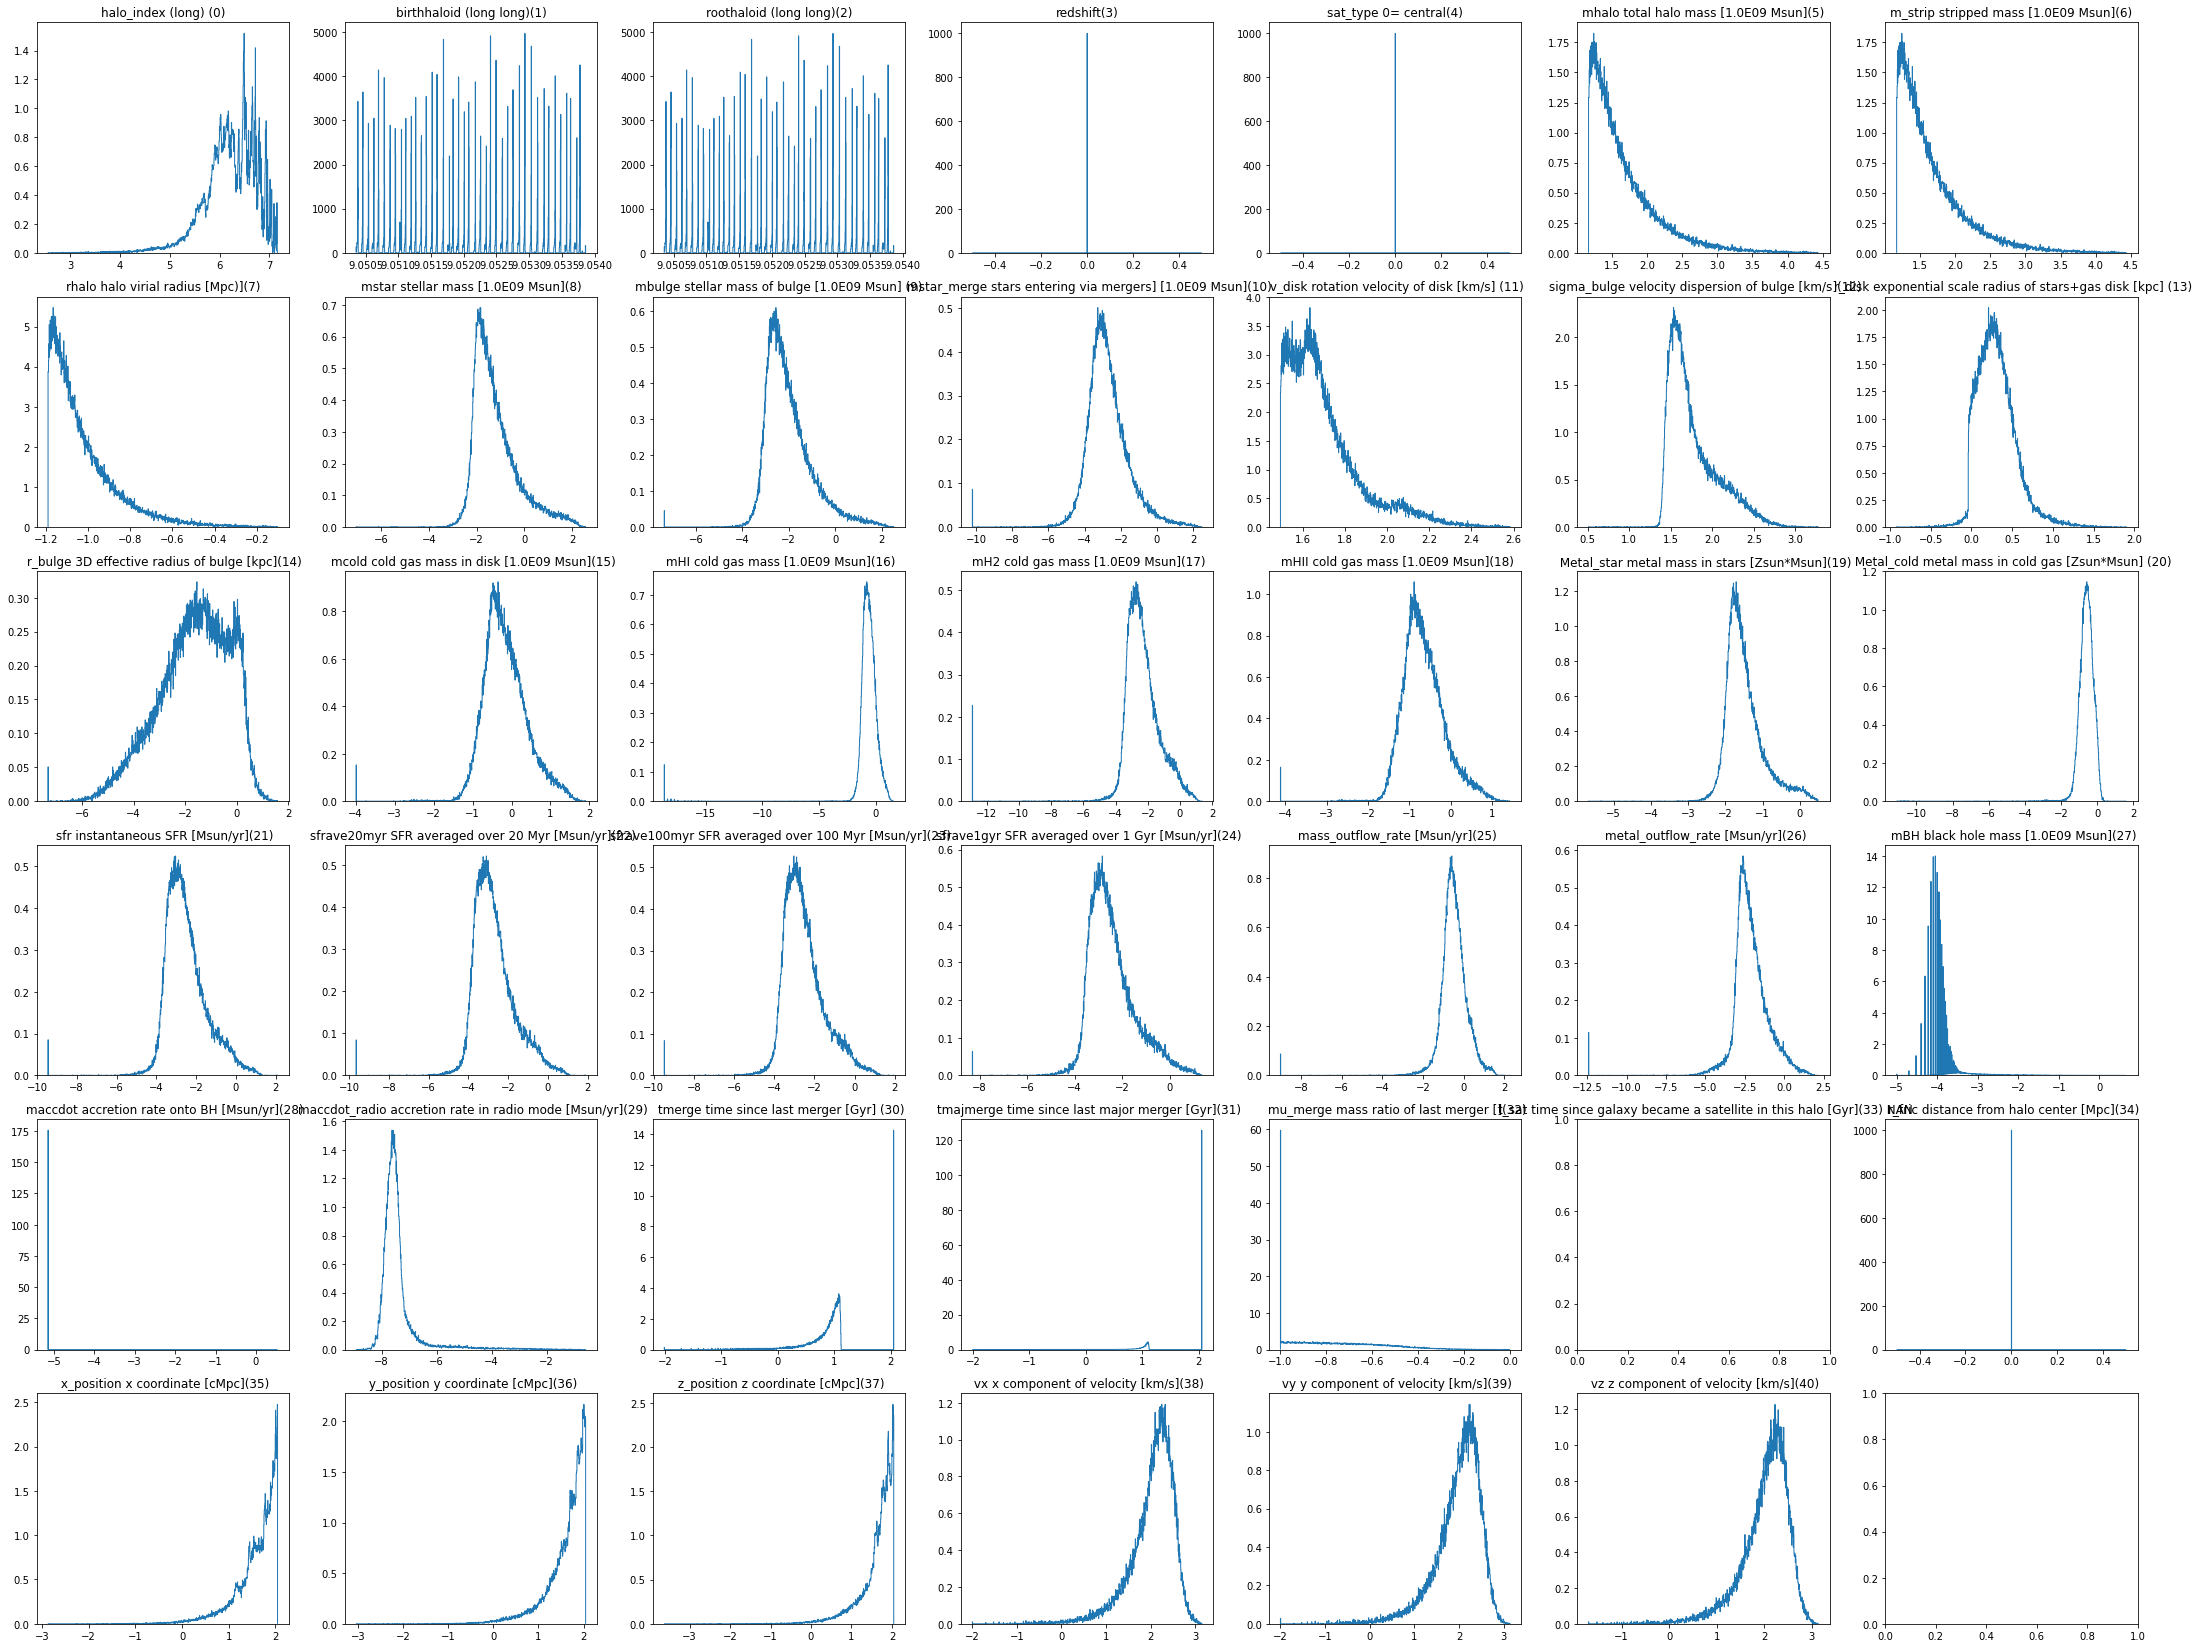

In [69]:
fig,ax=plt.subplots(nrows=6,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_t))):
    try:
        if i in [19,20]:
            ax[i].hist(np.log10(10**ys_floor[:,i]/10**ys_floor[:,8]), bins=1000, density=1, histtype='step');

            ax[i].set(title=cols_t[i])
        else:
            ax[i].hist(ys_floor[:,i], bins=1000, density=1, histtype='step');
            ax[i].set(title=cols_t[i])
    except:
        ax[i].set(title=cols_t[i]+' NAN')
# ax[8].hist(np.log10(10**ys_floor[:,5]/10**ys_floor[:,0]), bins=1000, density=1, histtype='step');

fig.tight_layout()

 80%|█████████████████████████████████████████████████▉            | 33/41 [00:00<00:00, 325.53it/s]/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6565: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/cj1223/.conda/envs/juptorch/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6566: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))
100%|██████████████████████████████████████████████████████████████| 41/41 [00:00<00:00, 320.69it/s]


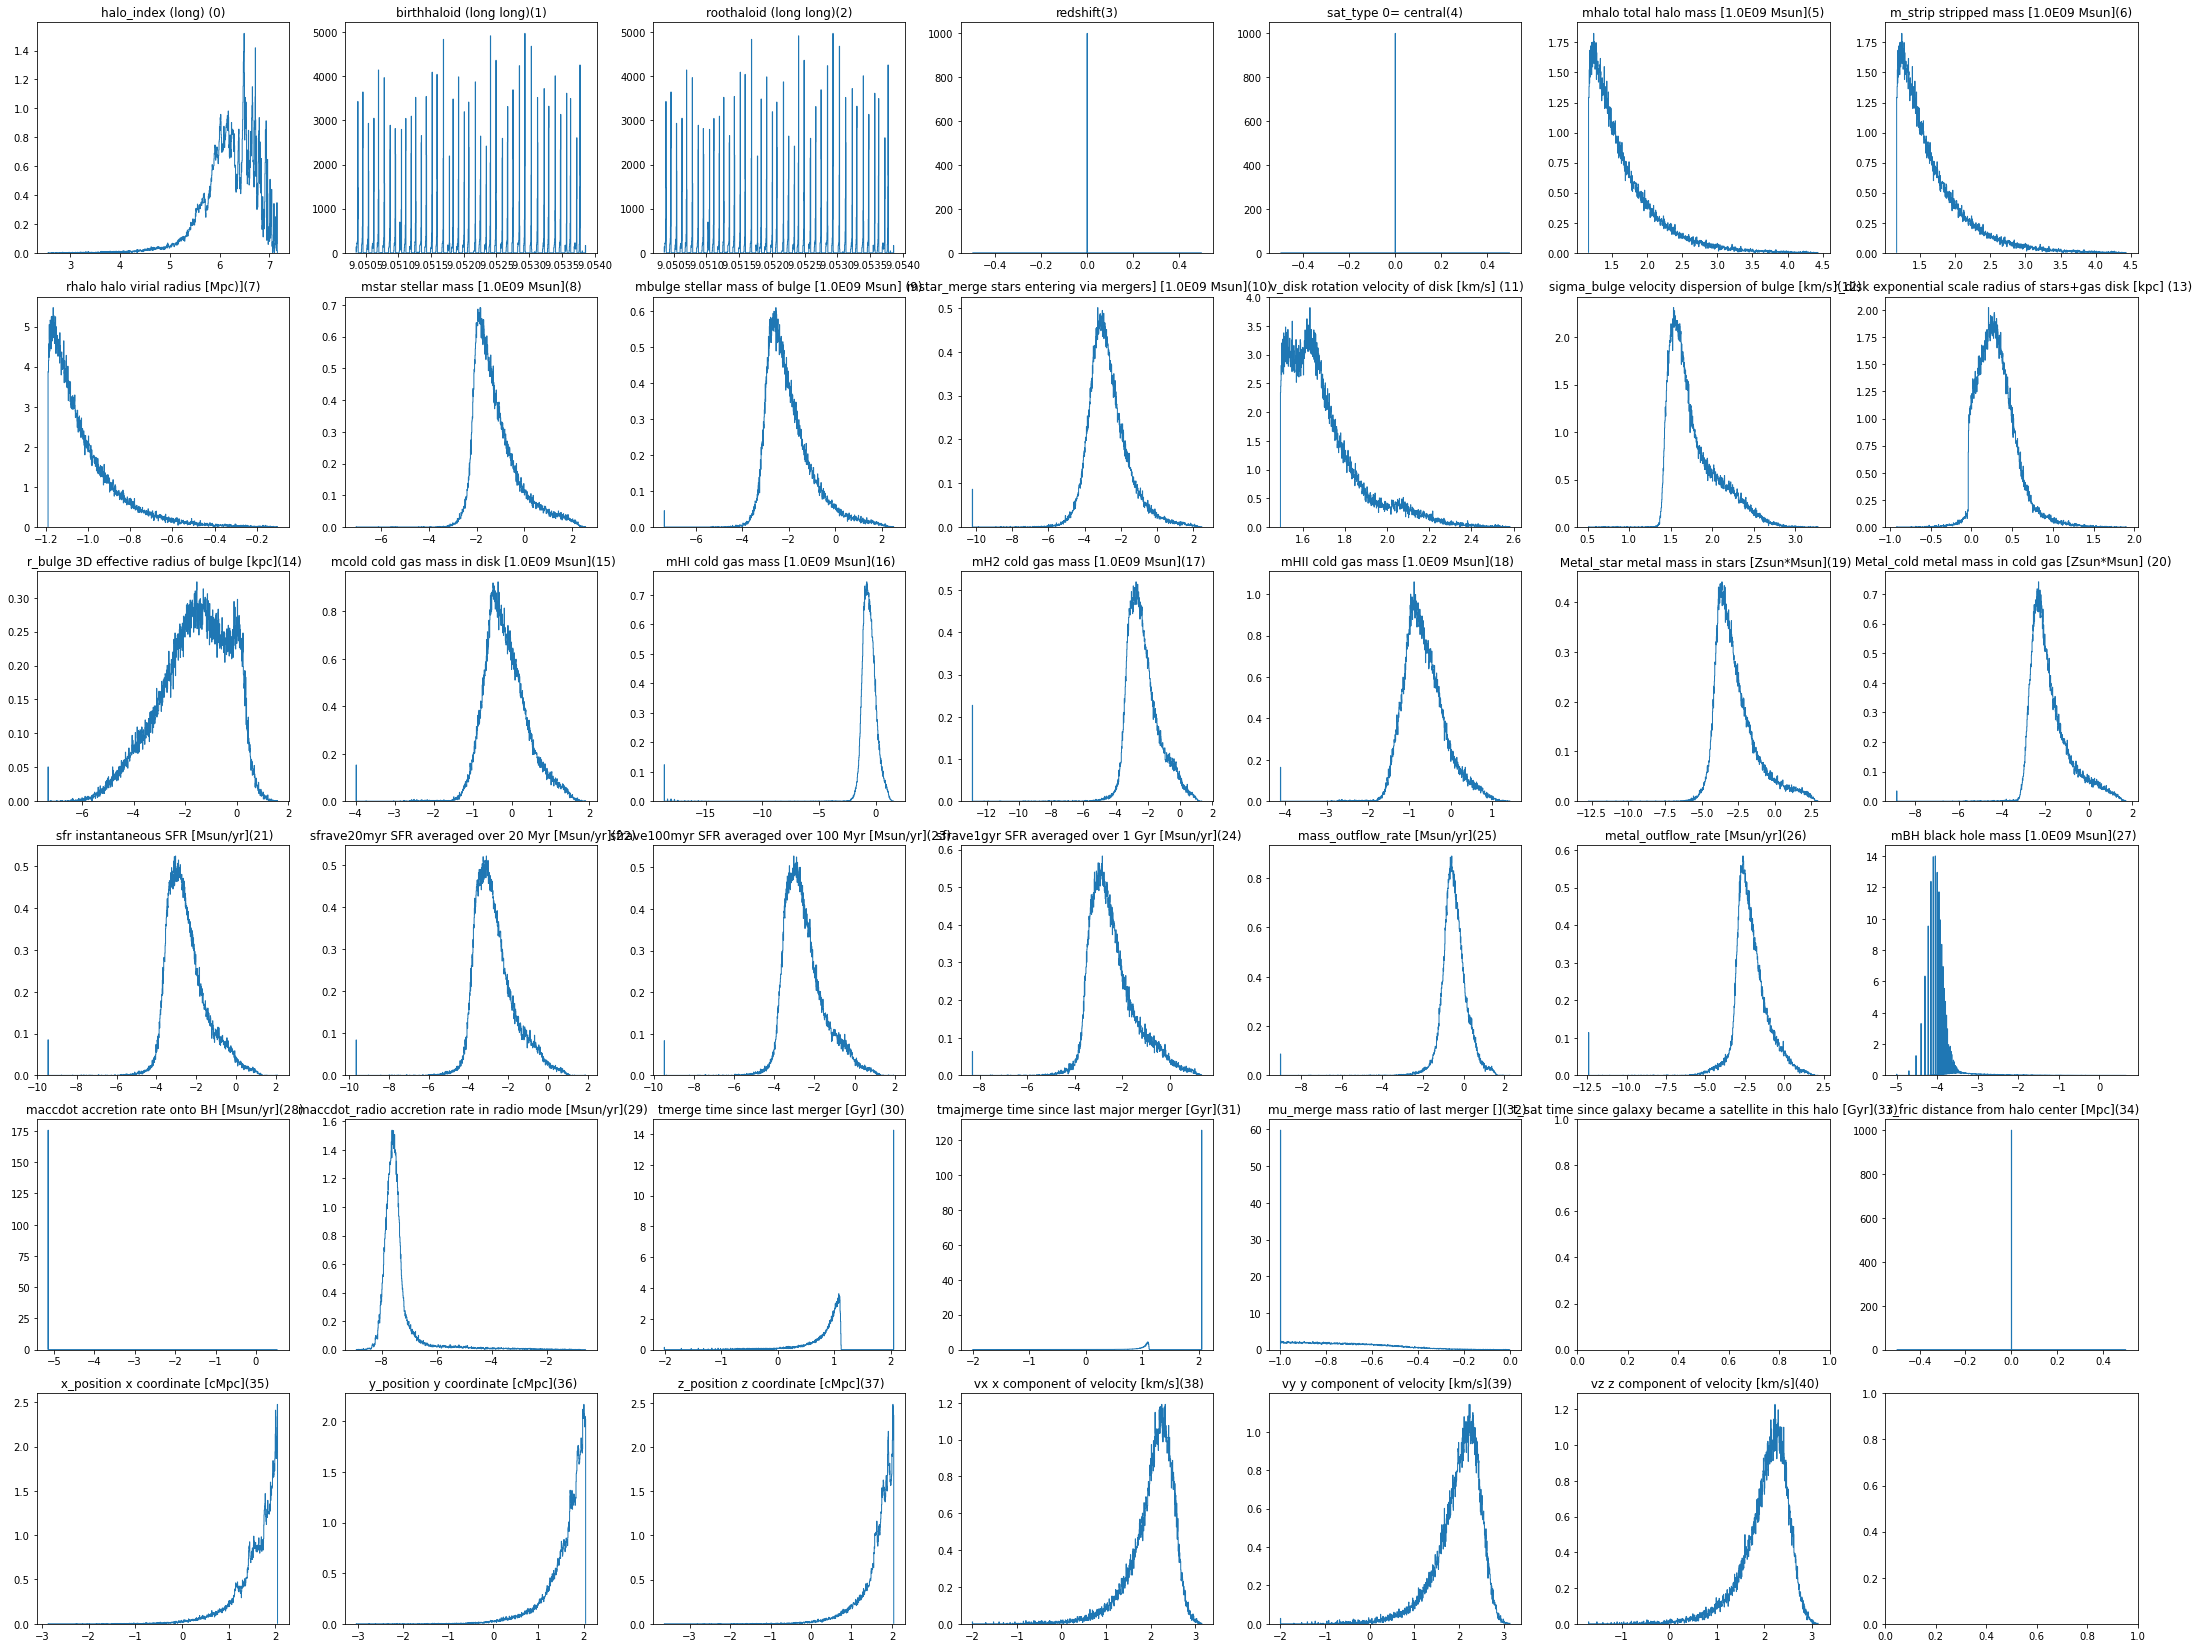

In [70]:
fig,ax=plt.subplots(nrows=6,ncols=7, figsize=(30,23))
ax=ax.flatten()

for i in tqdm(range(len(cols_t))):
    try:
        ax[i].hist(ys_floor[:,i], bins=1000, density=1, histtype='step');
        ax[i].set(title=cols_t[i])
    except:
        ax[i].set(title=cols_t[i])

fig.tight_layout()

In [74]:
case='vlarge_all_4t_z0.0_quantile_raw'
# case='vlarge_all_all_t_z0.0_None'

data=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}/data.pkl'), 'rb'))

In [79]:
mask = masks[0]
for i, m in enumerate(masks):
    if i in log:
        mask = np.logical_and(mask,m)
        print(sum(mask))

108808
108808
108808
108808
108760
108690
108690
108690
108690
108690
108593
108422
108339
108339
108339
108338
108338
108338
108338
108338
108338
108338
108338
108338


In [94]:
data_rm = []
data_floor = []
for i, d in enumerate(data):
    da = Data(x = d.x, edge_index = d.edge_index, edge_attr = d.edge_attr, y=torch.tensor(ys_floor[i], dtype=torch.float))
    data_floor.append(da)
    if mask[i]:
        data_rm.append(da)

In [95]:
len(data_rm)

108338

In [96]:
case='vlarge_all_allt_z0.0_quantile_raw_rm'
path=osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')
if not osp.exists(path):
    os.mkdir(path)
with open(path+'/data.pkl', 'wb') as handle:
    pickle.dump(data_rm, handle)

In [97]:
case='vlarge_all_allt_z0.0_quantile_raw_floor'
path=osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/{case}')
if not osp.exists(path):
    os.mkdir(path)
with open(path+'/data.pkl', 'wb') as handle:
    pickle.dump(data_floor, handle)

In [98]:
cols_t

['halo_index (long) (0)',
 'birthhaloid (long long)(1)',
 'roothaloid (long long)(2)',
 'redshift(3)',
 'sat_type 0= central(4)',
 'mhalo total halo mass [1.0E09 Msun](5)',
 'm_strip stripped mass [1.0E09 Msun](6)',
 'rhalo halo virial radius [Mpc)](7)',
 'mstar stellar mass [1.0E09 Msun](8)',
 'mbulge stellar mass of bulge [1.0E09 Msun] (9)',
 ' mstar_merge stars entering via mergers] [1.0E09 Msun](10)',
 ' v_disk rotation velocity of disk [km/s] (11)',
 ' sigma_bulge velocity dispersion of bulge [km/s](12)',
 ' r_disk exponential scale radius of stars+gas disk [kpc] (13)',
 ' r_bulge 3D effective radius of bulge [kpc](14)',
 ' mcold cold gas mass in disk [1.0E09 Msun](15)',
 ' mHI cold gas mass [1.0E09 Msun](16)',
 ' mH2 cold gas mass [1.0E09 Msun](17)',
 ' mHII cold gas mass [1.0E09 Msun](18)',
 ' Metal_star metal mass in stars [Zsun*Msun](19)',
 ' Metal_cold metal mass in cold gas [Zsun*Msun] (20)',
 ' sfr instantaneous SFR [Msun/yr](21)',
 ' sfrave20myr SFR averaged over 20 Myr [M